Scott Tse
8/11/16

__Introduction__

For my second project of the Data Analyst Nanodegree, I chose to analyze the Titanic dataset. This terrible disaster of the early 20th century has captured the imaginations of people across the generations. We have been provided a dataset from the Kaggle data science competition site containing passenger information.  After examining the codebook, I have decided to answer these research questions:  

1) Did children and adults have the same probability of surviving?  I read that a disproportionate number of men perished as a result of a “women and children first” policy during evacuation of the Titanic.  Do the data bear this out?

2) Is there any relationship between the ticket price and survival rate? A correlation may indicate some form of economic unfairness in the survivability among passengers.

3) Similar to question 2, does class of ticket show any relationship to survival rate?

---
__Exploratory Data Analysis__

In [26]:
# Set up analysis environment and import necessary libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline 

# open the titanic data

filename = 'C:/Users/Scott/Desktop/DAND/DAND P2/P2 Project/titanic_data.csv'
titanic_df = pd.read_csv(filename)

# show headers of the dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# take a look at the data types of each column
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From the dataframe we can see that there are 891 entries or rows in this sample.  Each entry represents a passenger and corresponding data. The description of each variable is below:

- PassengerId: index or row number (integers ranging from 1 to 891)

- Survived: whether passenger survived or not (2 levels: for survived or 0 for died)

- Pclass: class of the passengers ticket (1 = 1st; 2 = 2nd; 3 = 3rd)

- name: name of passenger

- sex: Sex of passenger (2 levels: male or female)

- age: age of passenger (float)

- sibsp: number of siblings and or spouse aboard ship

- parch: number of parents or children aboard ship

- ticket: unique ticket number

- cabin: cabin number (note that letter prefix denotes ship deck

- embarked: port of embarkation for that passenger (C = Cherbourg; Q = Queenstown; S = Southampton)


In [29]:
# convert data in 'Pclass' and 'Survived' to categorical variable type
titanic_df['Pclass']=titanic_df['Pclass'].astype('object')
titanic_df['Survived']=titanic_df['Survived'].astype('object')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 83.6+ KB


In [30]:
# lets look at some stats on differences bewteen those who did or didn't survive

grouped_by_survival = titanic_df.groupby('Survived')
grouped_by_survival.describe()

Age        Fare       Parch  PassengerId       SibSp
Survived                                                                   
0        count  424.000000  549.000000  549.000000   549.000000  549.000000
         mean    30.626179   22.117887    0.329690   447.016393    0.553734
         std     14.172110   31.388207    0.823166   260.640469    1.288399
         min      1.000000    0.000000    0.000000     1.000000    0.000000
         25%     21.000000    7.854200    0.000000   211.000000    0.000000
         50%     28.000000   10.500000    0.000000   455.000000    0.000000
         75%     39.000000   26.000000    0.000000   675.000000    1.000000
         max     74.000000  263.000000    6.000000   891.000000    8.000000
1        count  290.000000  342.000000  342.000000   342.000000  342.000000
         mean    28.343690   48.395408    0.464912   444.368421    0.473684
         std     14.950952   66.596998    0.771712   252.358840    0.708688
         min      0.420000    0.000000    0.000000     2.000000    0.000000
         25%     19.000000   12.475000    0.000000   250.750000    0.000000
         50%     28.000000   26.000000    0.000000   439.500000    0.000000
         75%     36.000000   57.000000    1.000000   651.500000    1.000000
         max     80.000000  512.329200    5.000000   890.000000    4.000000

In the table above, we have sorted the data by who those who survived (denoted by the level ‘1’) and those who did not (denoted by the level ‘0’).  The summary statistics show some interesting numbers at first glance.

- From the summary of PassengerId, we can see that of the sample of 891 passengers, 549 died and 342 survived. That is a survival rate of 38.4% for this sample.
- For those who died, mean age was 30.6 years with standard deviation of 14.2 years. For those who survived, mean age was 28.34 years, with a standard deviation of 15.0 years.
- For those who died, mean ticket fare was 22.1 lbs, standard deviation of 31.4 lbs and for those who survived, mean ticket fare was 48.4 lbs with standard deviation of 66.6 lbs.  


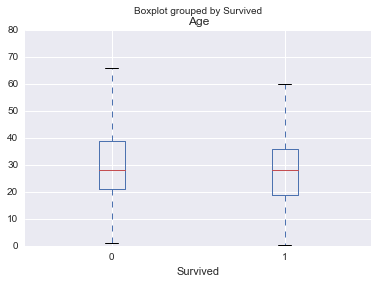

In [31]:
# generate boxplot to compare ages of those who survived and didn't 
titanic_df.boxplot(column = 'Age', by = 'Survived')
plt.show()

From the boxplot above, we can see that the IQR boxes for those who survived shows a lower age range than for thos who died. The data appears to show some slight right skew for both groups which makes sense since a person cannot be lower in age than 0.

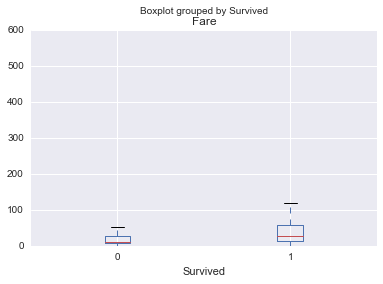

In [32]:
# boxplot of survival by fare
titanic_df.boxplot(column = 'Fare', by = 'Survived')
plt.show()

From the boxplot above, we can see that there some visual difference in IQR for those that survived and those that did not. Again, both groups are right skewed since a ticket cannot have a negative price.  One can see that the median fare price is higher for the survived group, with upper quartile also visually higher.

In [33]:
# survival by ticket class
# found this on http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19.html
# We can create a barplot by creating a table of counts for a certain variable using the pd.crosstab() function 
# and then passing the counts to df.plot
Pclass_table = pd.crosstab(index=titanic_df["Pclass"], columns=titanic_df["Survived"])
Pclass_table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [34]:
# recalculate crosstab of Pclass by survival as a percentage
Pclass_table_norm = pd.crosstab(index=titanic_df["Pclass"], columns=titanic_df["Survived"]).apply(lambda r: r/r.sum(), axis=1)
Pclass_table_norm

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


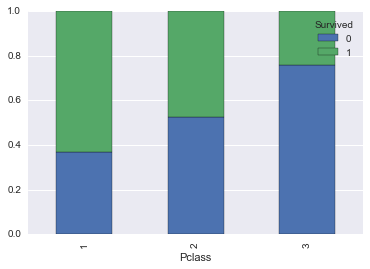

In [35]:
# plot stacked barplot of survival by Pclass
Pclass_table_norm.plot.bar(stacked = True)
plt.show()

From the barplot above, we see can see a progression of lower survival rate from 1st class ticket (highest survival rate shown by relative area of green portion of stack) descending for 2nd clas and then worst for 3rd class tickets.

---
__Inference__

__Recall our first question: did children and adults have the same probability of surviving?__  

In order to further explore this question. I added a column to the titanic_df dataframe classifying whether an individual was an adult or a child. For the purposes of this analysis, I classified anyone 18 years or older as an adult. In the new column age_class, I assigned a level of True if an individual is an adult.

In [36]:
titanic_df['age_class'] = titanic_df['Age'] >= 18
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


In [37]:
# generate crosstab of survival by age class
age_class_table = pd.crosstab(index=titanic_df["age_class"], columns=titanic_df["Survived"], margins = True)
age_class_table

Survived,0,1,All
age_class,,,
False,177,113,290
True,372,229,601
All,549,342,891


In [38]:
# generate crosstab of survival by age class, this time on percentage basis
age_class_table_norm = \
pd.crosstab(index=titanic_df["age_class"], columns=titanic_df["Survived"]).apply(lambda r: r/r.sum(), axis=1)
age_class_table_norm

Survived,0,1
age_class,,
False,0.610345,0.389655
True,0.618968,0.381032


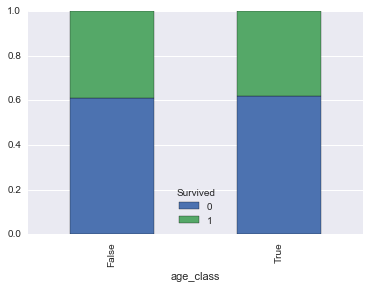

In [39]:
# stacked barplot of survival by age class (% of total)
age_class_table_norm.plot.bar(stacked = True)
plt.show()

From the crosstab table and barplot above, we see that survival rate for adults and children (as I have defined adulthood as >= 18 years) is very similar, 39.0% vs 38.1% respectively for children and adults, respectively. The barplots for age_class appear virtually identical.

In order to have a more rigorous test of whether there is any relatonship between age_class and survivial, I performed a chi-square test of independence between the two variables below. I found come documentation about performing the chi squared test of independence on contingency tables (http://connor-johnson.com/2014/12/31/the-pearson-chi-squared-test-with-python-and-r/) and adapted the code.






In [44]:
#age_class_table
chi2, p, ddof, expected = stats.chi2_contingency(age_class_table)
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
expected

Test Statistic: 0.0615070283177
p-value: 0.999536695121
Degrees of Freedom: 4



array([[ 178.68686869,  111.31313131,  290.        ],
       [ 370.31313131,  230.68686869,  601.        ],
       [ 549.        ,  342.        ,  891.        ]])

Based on the output above, we have a very high p-value of .999, much greater than the standard signifance level of 5%. Thus, we cannot reject the null hypothesis that p-hat age_class and p-hat survived are independent.  That is, the data do not give enough evidence to state that the proportion of those who lived or died is different for adults (aged 18 or older) versus children, in the population of Titanic passengers.  These variables may be considered independent. Note that the output of the object 'expected' above is the contingency table, ie crosstab, of survival vs age_class one would expect if the variables are independent and one can see that the values are very close to the actual crosstab table values for these two variables.  

__Next, I further explore question 2) Is there any relationship between the ticket price and survival rate? I chose to use a hypothesis test based on the t-statistic.__ 

I chose a t-test since we do not know the population parameters.

We look a the difference of the two means , under the condition that the data are not paired.  

Thus, for this comparison, we can set up our hypotheses as follows:

Null Hypothesis: H0: u survived - u died = 0
Alternative Hypothesis: HA: u survived - u died != 0

In [41]:
# for the t test to apply we need two conditions to apply:
# 1) the observations need to be independent, thus we can take a sample of size less than 10% of the population
# to help ensure independance
# since there were 2228 people on board the Titanic, I choose to select a sample of 200 people to compare
# 2) the data need to be nearly normal

titanic_reduced_df = titanic_df.sample(n = 200)
grouped_by_survival_reduced = titanic_reduced_df.groupby('Survived', as_index=False)
grouped_by_survival_reduced.describe()

# Summary statistics:

PassengerId        Age       SibSp       Parch        Fare
0 count   118.000000  94.000000  118.000000  118.000000  118.000000
  mean    472.067797  28.808511    0.389831    0.262712   18.650458
  std     260.884941  14.192059    0.969923    0.605219   28.606728
  min       8.000000   2.000000    0.000000    0.000000    0.000000
  25%     228.250000  20.000000    0.000000    0.000000    7.750000
  50%     474.500000  25.000000    0.000000    0.000000    9.500000
  75%     718.000000  37.500000    0.000000    0.000000   20.937500
  max     889.000000  70.500000    4.000000    2.000000  247.520800
1 count    82.000000  67.000000   82.000000   82.000000   82.000000
  mean    432.060976  28.859403    0.536585    0.500000   48.450305
  std     255.442649  14.940924    0.688443    0.741204   51.578319
  min       9.000000   0.830000    0.000000    0.000000    7.250000
  25%     248.250000  22.000000    0.000000    0.000000   14.021875
  50%     409.000000  28.000000    0.000000    0.000000   26.775000
  75%     640.000000  37.500000    1.000000    1.000000   63.244800
  max     880.000000  60.000000    3.000000    2.000000  263.000000

In [42]:
print grouped_by_survival_reduced
# create series from titanic_reduced_df where fare data is subset by individuals who did not survive
cat1 = titanic_reduced_df[titanic_reduced_df['Survived'] == 0]['Fare']
# then by those who did survive
cat2 = titanic_reduced_df[titanic_reduced_df['Survived'] == 1]['Fare']

# double check summary statistics for each group
print cat1.describe()
print cat2.describe()

count    118.000000
mean      18.650458
std       28.606728
min        0.000000
25%        7.750000
50%        9.500000
75%       20.937500
max      247.520800
Name: Fare, dtype: float64
count     82.000000
mean      48.450305
std       51.578319
min        7.250000
25%       14.021875
50%       26.775000
75%       63.244800
max      263.000000
Name: Fare, dtype: float64


From the summary stastistics above, we can see that the mean fare of those passengers who survived is 41.60 lbs, with a standard deviation of 35.87, based on an n = 67. For those paseengers in the sample that perished, the mean fare is 20.73 lbs with a standard deviation of 32.88 and n = 118. 

In [43]:
# then perform 2 sided t-test comparing non-paired means 
t, p = stats.ttest_ind(cat1, cat2)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = -5.22802  p = 4.33479e-07


Based on results of the t-test the p value is smaller than the standard significance level of .05 so we reject the null hypothesis (u survived - u died = 0) and can state that based on the data, the mean fare of those who died and those who survived are indeed different. 

__Lastly, I explore the 3rd question, does class of ticket show any relationship to survival rate?__

Again, I used a chi squared test of independence to compare whether the 'Pclass' (Passenger) and 'Survival' (whether individual survived) variables are independent in this data.  

In [45]:
chi2, p, ddof, expected = stats.chi2_contingency(Pclass_table)
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
expected

Test Statistic: 102.888988757
p-value: 4.5492517113e-23
Degrees of Freedom: 2



array([[ 133.09090909,   82.90909091],
       [ 113.37373737,   70.62626263],
       [ 302.53535354,  188.46464646]])

The output above are the test statistic X^2, p-value and degrees of freedom for the chi squared test of independence between the two variables. In addition, the expected contingency table is output, assuming the null hypothesis that the variables are independent.  

One can clearly see that the p-value is very small (6.25846242353e-20) and certainly lower than the standard 5% significance level. Based on these results, we reject the null hypothesis and conclude that within the population of Titanic passengers, Passenger Class and Survival are dependent variables. The data suggest that whether one survived on the Titanic was dependent on the ticket class.

---

__Conclusion__

In this report I explored the Titanic dataset to look at some variables that may have a relationship with survival.  In summary here is what I found.

1) Regarding the question of the survival rate of children versus adults, I did not find enough evidence from the data to show a difference in survival between adults (>= 18 years old) and children
2) Regarding the question of whether there is a relationship between fare price and survival, I did find a statistically significant difference in mean fares between those who survived and those who perished. Those who perished did have a lower mean ticket price suggesting some bias in survival towards those who paid more for a ticket.
3) Regarding ticket class and survival, we do see a correlation bewtween ticket class and survival. There appear to be a descending survival rate from first class, though second and third class ticket holders.

